In [496]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [79]:
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Text(0.5, 1.0, 'Average Price')

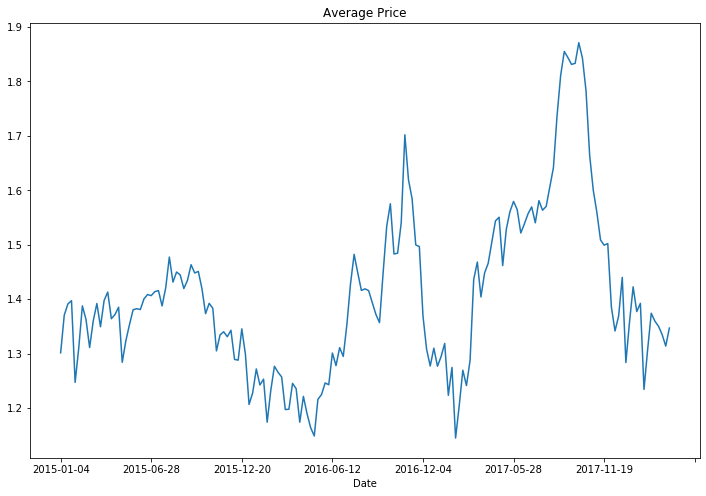

In [81]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [4]:
def converter(cluster):
    if cluster=='conventional':
        return 1
    else:
        return 0

In [5]:
df['Cluster'] = df['type'].apply(converter)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('type',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)

In [7]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Cluster
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1


In [8]:
# we wanna look at average price and be able to pridict it for future dates

In [9]:
# convert it into array for machine processing
dataset = df.values

In [10]:
dataset

array([[1.3300000e+00, 6.4236620e+04, 1.0367400e+03, ..., 0.0000000e+00,
        2.0150000e+03, 1.0000000e+00],
       [1.3500000e+00, 5.4876980e+04, 6.7428000e+02, ..., 0.0000000e+00,
        2.0150000e+03, 1.0000000e+00],
       [9.3000000e-01, 1.1822022e+05, 7.9470000e+02, ..., 0.0000000e+00,
        2.0150000e+03, 1.0000000e+00],
       ...,
       [1.8700000e+00, 1.3766760e+04, 1.1919200e+03, ..., 0.0000000e+00,
        2.0180000e+03, 0.0000000e+00],
       [1.9300000e+00, 1.6205220e+04, 1.5276300e+03, ..., 0.0000000e+00,
        2.0180000e+03, 0.0000000e+00],
       [1.6200000e+00, 1.7489580e+04, 2.8947700e+03, ..., 0.0000000e+00,
        2.0180000e+03, 0.0000000e+00]])

In [408]:
# Everything before the comma refers to the rows of the array and 
# everything after the comma refers to the columns of the arrays.

X = dataset[:,0:10]


In [409]:
Y = dataset[:,10]


In [410]:
from sklearn import preprocessing


In [411]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [412]:
X_scale

array([[3.16725979e-01, 1.02634162e-03, 4.55837802e-05, ...,
        1.63050227e-05, 0.00000000e+00, 0.00000000e+00],
       [3.23843416e-01, 8.76600710e-04, 2.96470005e-05, ...,
        1.70463985e-05, 0.00000000e+00, 0.00000000e+00],
       [1.74377224e-01, 1.89000237e-03, 3.49416730e-05, ...,
        1.80343168e-05, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.08896797e-01, 2.18895720e-04, 5.24067937e-05, ...,
        7.39802156e-06, 0.00000000e+00, 1.00000000e+00],
       [5.30249110e-01, 2.57907608e-04, 6.71674191e-05, ...,
        8.74263951e-06, 0.00000000e+00, 1.00000000e+00],
       [4.19928826e-01, 2.78455540e-04, 1.27278353e-04, ...,
        4.54792107e-06, 0.00000000e+00, 1.00000000e+00]])

In [413]:
from sklearn.model_selection import train_test_split
# dataset split into two
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# we want a separate validation set and test set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#X_train (10 input features, 70% of full dataset)
#X_val (10 input features, 15% of full dataset)
#X_test (10 input features, 15% of full dataset)
#Y_train (1 label, 70% of full dataset)
#Y_val (1 label, 15% of full dataset)
#Y_test (1 label, 15% of full dataset)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(12774, 10) (2737, 10) (2738, 10) (12774,) (2737,) (2738,)


In [414]:
# builfing # setup 

In [415]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator



In [416]:
model = Sequential([Dense(32, activation='relu', input_shape=(10,)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),])


In [417]:
# model = Sequential([ ... ]) - 
# says that we will store our model in the variable ‘model’, 
# sequentially (layer by layer) in between the square brackets.

# first layer
# Dense(32, activation='relu', input_shape=(10,)),
# first layer as a dense layer with 32 neurons, ReLU activation 
# and the input shape is 8 since we have 8 input features. 

# second layer
# Dense(32, activation='relu'),
# second layer is also a dense layer with 32 neurons, ReLU activation.
# Note that we do not have to describe the input shape since Keras 
# can infer from the output of our first layer.

# third layer
# Dense(1, activation='sigmoid'),
# Our third layer is a dense layer with 1 neuron, sigmoid activation.




In [418]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# the brackets hold the following settings 

# optimizer='sgd'
# ‘sgd’ refers to stochastic gradient descent 
# here, it refers to mini-batch gradient descent

# loss='binary_crossentropy'
# The loss function for outputs that take the values 1 or 0 
# is called binary cross entropy.

# metrics=['accuracy']
# want to track accuracy on top of the loss function. 


In [424]:
hist = model.fit(X_train, Y_train, batch_size=500, epochs=50,
                 validation_data=(X_val, Y_val))


Train on 12774 samples, validate on 2737 samples
Epoch 1/50
12774/12774 [==============================] - 0s 5us/step - loss: 0.6151 - accuracy: 0.8023 - val_loss: 0.6141 - val_accuracy: 0.7994
Epoch 2/50
12774/12774 [==============================] - 0s 9us/step - loss: 0.6125 - accuracy: 0.8048 - val_loss: 0.6115 - val_accuracy: 0.8009
Epoch 3/50
12774/12774 [==============================] - 0s 7us/step - loss: 0.6099 - accuracy: 0.8061 - val_loss: 0.6087 - val_accuracy: 0.8012
Epoch 4/50
12774/12774 [==============================] - 0s 7us/step - loss: 0.6072 - accuracy: 0.8044 - val_loss: 0.6060 - val_accuracy: 0.8012
Epoch 5/50
12774/12774 [==============================] - 0s 6us/step - loss: 0.6045 - accuracy: 0.8058 - val_loss: 0.6033 - val_accuracy: 0.8001
Epoch 6/50
12774/12774 [==============================] - 0s 6us/step - loss: 0.6017 - accuracy: 0.8062 - val_loss: 0.6004 - val_accuracy: 0.8001
Epoch 7/50
12774/12774 [==============================] - 0s 6us/step - los

In [425]:
model.evaluate(X_test, Y_test)[1]

# evaluate model on the test set. 
# To find the accuracy on our test set

# the index 1 after the model.evaluate function is because function 
# returns the loss as the first element and the accuracy as the 
# second element. 
# only output the accuracy, simply access the second element 
# (which is indexed by 1, since the first element starts its indexing from 0).

# first try gave 82% in test accuracy which is good but we want to be closer to 100


2738/2738 [==============================] - 0s 22us/step


0.7940102219581604

In [426]:
# function ‘fit’ is called, we are fitting the parameters to the data. 
# We have to specify what data we are training on, 
# which is X_train and Y_train. 
# Then, we specify the size of our mini-batch and how long we 
# want to train it for (epochs). 
# we specify what our validation data is so that the model will 
# tell us how we are doing on the validation data at each point. 
# function will output a history, we save under the variable hist. 
# We’ll use this variable a little later when we get to visualization.

# see that the model is training! 
# the numbers show the loss decrease and the accuracy increase 
# you can experiment with the hyper-parameters and neural network 
# architecture. 

In [427]:
# Visualizing Loss and Accuracy#

In [428]:
import matplotlib.pyplot as plt


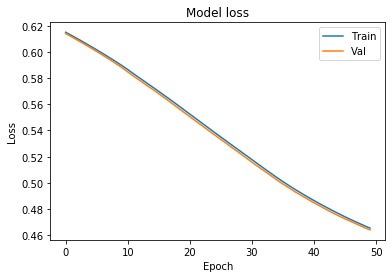

In [429]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


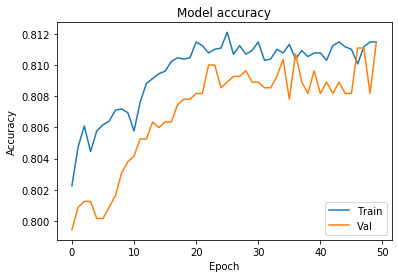

In [430]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [423]:
# Since improvements model looks somewhat matched up with improvements
# to the validation set, it doesn’t seem like overfitting is a 
# huge problem in our model.


In [335]:
# Adding Regularization to our Neural Network#

# introducing regularization to our neural network:
# let’s formulate with a neural network that will badly overfit on 
# our training set. We’ll call this Model 2.





In [431]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(10,)), 
                      Dense(1000, activation='relu'),    
                      Dense(1000, activation='relu'),    
                      Dense(1000, activation='relu'),    
                      Dense(1, activation='sigmoid'),])

# we’ve made a much larger model and we’ve use the Adam optimizer. 
# Adam is one of the most common optimizers we use
# adds some tweaks to stochastic gradient descent such 
# that it reaches the lower loss function faster. 


In [432]:
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [435]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=1500, epochs=50,          validation_data=(X_val, Y_val))


Train on 12774 samples, validate on 2737 samples
Epoch 1/50
12774/12774 [==============================] - 3s 214us/step - loss: 0.1454 - accuracy: 0.9379 - val_loss: 0.1340 - val_accuracy: 0.9412
Epoch 2/50
12774/12774 [==============================] - 3s 209us/step - loss: 0.1525 - accuracy: 0.9364 - val_loss: 0.1565 - val_accuracy: 0.9423
Epoch 3/50
12774/12774 [==============================] - 3s 212us/step - loss: 0.1341 - accuracy: 0.9446 - val_loss: 0.1286 - val_accuracy: 0.9390
Epoch 4/50
12774/12774 [==============================] - 3s 212us/step - loss: 0.1201 - accuracy: 0.9508 - val_loss: 0.1220 - val_accuracy: 0.9456
Epoch 5/50
12774/12774 [==============================] - 3s 217us/step - loss: 0.1153 - accuracy: 0.9558 - val_loss: 0.1465 - val_accuracy: 0.9481
Epoch 6/50
12774/12774 [==============================] - 3s 213us/step - loss: 0.1606 - accuracy: 0.9409 - val_loss: 0.1200 - val_accuracy: 0.9445
Epoch 7/50
12774/12774 [==============================] - 3s 21

In [438]:
model_2.evaluate(X_test, Y_test)[1]
#model_2.evaluate(X_test, Y_test)[1]

2738/2738 [==============================] - 1s 293us/step


0.9740686416625977

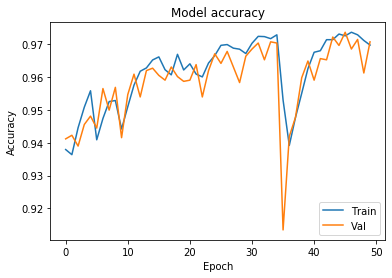

In [439]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# The model does not show any sign of overfitting 
# The training loss is not decreasing and  the validation loss is closly following the traning 
# no clear divergece between train and validation accuracy

# when we check the accuracy it now tell us that it is close to 97% (0.9788166284)

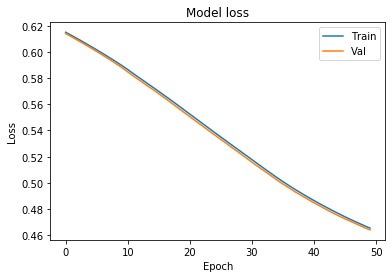

In [440]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [250]:
#reduce overfitting if excist# 

# to try out some of our strategies to reduce over-fitting 


In [340]:
from keras.layers import Dropout
from keras import regularizers

# Difference 1: To add regularization, we’ve added extra code in each of our dense layers like this:
# kernel_regularizer=regularizers.l2(0.01)
# This tells Keras to include the squared values of those parameters 
# in our overall loss function, and weight them by 0.01 in the loss function.

# Difference 2: To add Dropout, we added a new layer like this:
# Dropout(0.3),
# This means that the neurons in the previous layer has a probability 
# of 0.3 in dropping out during training.

In [441]:
model_3 = Sequential([Dense(1000, activation='relu', 
                            kernel_regularizer=regularizers.l2(0.01), 
                            input_shape=(10,)),    
                      Dropout(0.3),
                      Dense(1000, 
                            activation='relu', 
                            kernel_regularizer=regularizers.l2(0.01)),
                      Dropout(0.3),    
                      Dense(1000, activation='relu', 
                            kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])


In [442]:
model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [443]:
hist_3 = model_3.fit(X_train, Y_train, batch_size=4000, epochs=50,          validation_data=(X_val, Y_val))


Train on 12774 samples, validate on 2737 samples
Epoch 1/50
12774/12774 [==============================] - 4s 316us/step - loss: 29.5097 - accuracy: 0.5454 - val_loss: 25.6022 - val_accuracy: 0.8144
Epoch 2/50
12774/12774 [==============================] - 3s 237us/step - loss: 24.1062 - accuracy: 0.7076 - val_loss: 20.4371 - val_accuracy: 0.7377
Epoch 3/50
12774/12774 [==============================] - 3s 235us/step - loss: 19.1430 - accuracy: 0.7248 - val_loss: 16.0246 - val_accuracy: 0.7965
Epoch 4/50
12774/12774 [==============================] - 3s 236us/step - loss: 14.9508 - accuracy: 0.7679 - val_loss: 12.3898 - val_accuracy: 0.7906
Epoch 5/50
12774/12774 [==============================] - 3s 257us/step - loss: 11.5216 - accuracy: 0.7539 - val_loss: 9.4678 - val_accuracy: 0.7647
Epoch 6/50
12774/12774 [==============================] - 3s 229us/step - loss: 8.7805 - accuracy: 0.7220 - val_loss: 7.1670 - val_accuracy: 0.7808
Epoch 7/50
12774/12774 [==============================

In [444]:
model_3.evaluate(X_test, Y_test)[1]

2738/2738 [==============================] - 1s 417us/step


0.4912344813346863

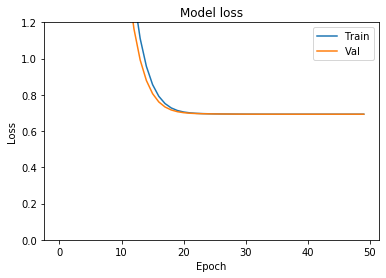

In [445]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()


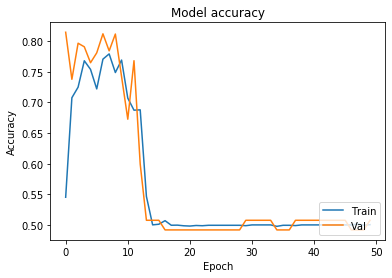

In [446]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# the more we train the model the less accurate it becomes

In [447]:
data = df
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [448]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [452]:
def converter(cluster):
    if cluster=='organic':
        return 1
    else:
        return 0

In [453]:
df['Cluster'] = df['type'].apply(converter)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Cluster
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [454]:
df.drop('type',axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Cluster
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1


In [458]:
#df.drop('Date',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Cluster
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [503]:
data = pd.read_csv('avocado.csv')
#mae, mse = model.evaluate(X_test, Y_test, verbose=0)
#print('mae:',mae)
#print('mse:',mse)

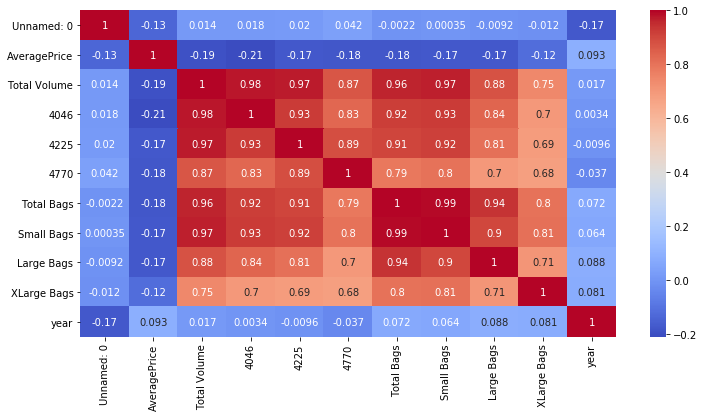

In [504]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [505]:
data['region'].nunique()

54

In [507]:
data['year'].nunique()

4

In [510]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [511]:
final_df =pd.get_dummies(data.drop(['region','Date'],axis=1),drop_first=True)

In [512]:
final_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [516]:
X=final_df.iloc[:,1:11]
y=final_df['AveragePrice']

In [517]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [518]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [520]:
y_pred = lr.predict(X_test)


In [523]:
newData = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
newData

,Actual,Predicted
8604,0.82,1.228094
2608,0.97,1.102022
14581,1.44,1.648891
4254,0.97,1.146743
16588,1.45,1.686817
...,...,...
15956,1.27,1.688523
12471,1.67,1.649132
4574,0.59,1.097055
16359,1.92,1.687211


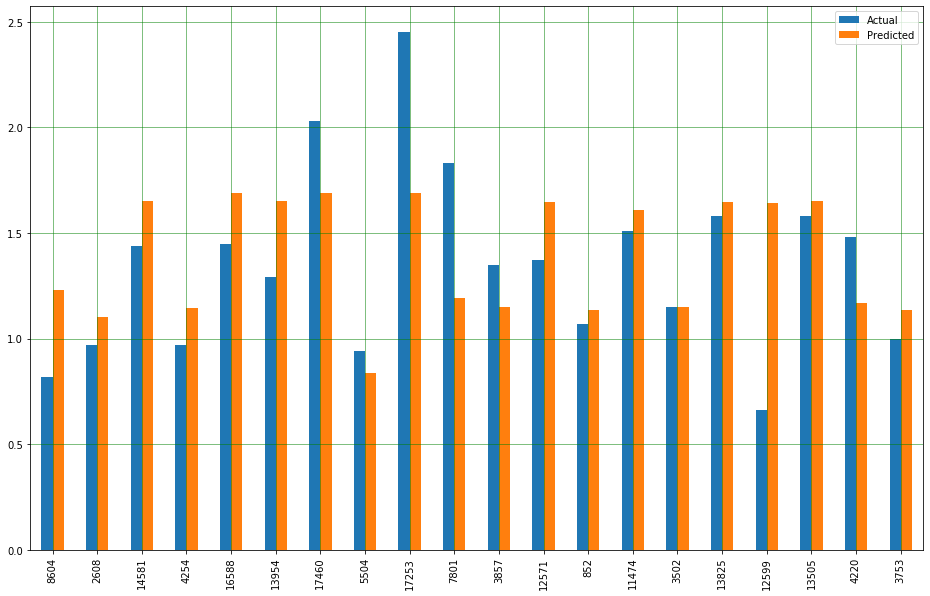

In [529]:
df1 = newData.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# As the number of records is huge, for representation purpose I’m taking just 25 records.

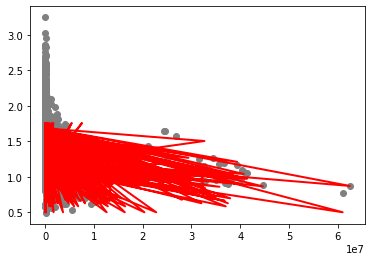

In [543]:
plt.scatter(X_test.iloc[:,0].values, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# plt.scatter(y_test, X_test.iloc[:,0].values)

In [544]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2409765503267063
MSE: 0.097609903508232
RMSE: 0.3124258368128859


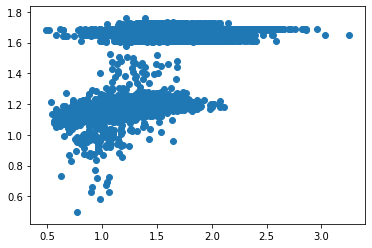

In [545]:
plt.scatter(x=y_test,y=pred)


In [ ]:
# this model does not show a straight line which means that it is not a good model to use
# what can we do to make these results better?

In [ ]:
# lets try with DecisionTree Regressor model

In [546]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

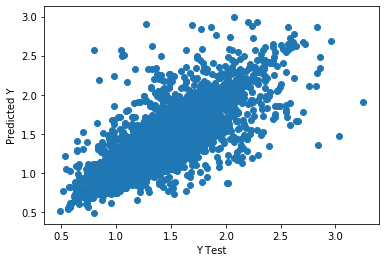

In [547]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [548]:
# with the Decision tree model the results become closer to a 
# straight line 
# it is deffinetly better than the Linear regression model
# to be sure we are gonna look at RMSE: metrics mean squared error

In [549]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.15870684931506848
MSE: 0.06237254794520548
RMSE: 0.24974496580553027


In [ ]:
# RMSE is closer to 0 with Decision tree: 0.25

In [550]:
#Random Forest Regressor#
# just to test another model we will look at random forest

In [551]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [553]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12364569863013697
MSE: 0.03173871015890411
RMSE: 0.1781536139372539


In [ ]:
# these results show that the random forest model is the better choice and model in this case

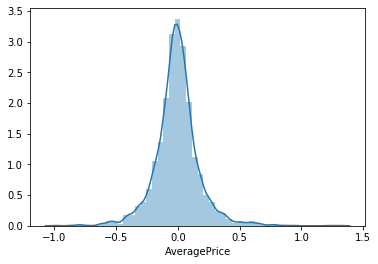

In [554]:
sns.distplot((y_test-pred),bins=50)


In [555]:
# if we look at this discribution graph it tells us that the 
# distribution looks normal with is a good sign and the model 
# is correct


,Y Test,Pred
8604,0.82,1.0322
2608,0.97,0.9972
14581,1.44,1.3964
4254,0.97,0.9193
16588,1.45,1.4700


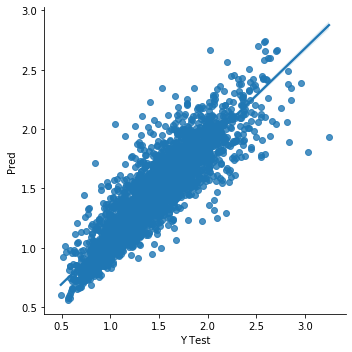

In [557]:
data1 = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data1,palette='rainbow')
data.head()

In [558]:
#try to predict#
datatry = pd.read_csv('avocado.csv')
datatry.groupby('type').groups


{'conventional': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125],
            dtype='int64', length=9126),
 'organic': Int64Index([ 9126,  9127,  9128,  9129,  9130,  9131,  9132,  9133,  9134,
              9135,
             ...
             18239, 18240, 18241, 18242, 18243, 18244, 18245, 18246, 18247,
             18248],
            dtype='int64', length=9123)}

In [563]:
PREDICTION_TYPE = 'conventional'
dfNew = datatry[datatry.type == PREDICTION_TYPE]


In [565]:
dfNew['Date'] = pd.to_datetime(datatry['Date'])


/Users/benazeerturkmani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [568]:
regions = dfNew.groupby(dfNew.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))
    
# Let's check how many distinct regions column 
# region includes and how many entries each region has.


Total regions : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169
Syracuse  

In [569]:
PREDICTING_FOR = "TotalUS"


In [570]:
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)


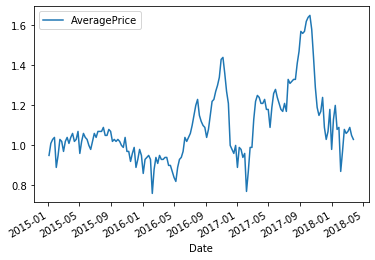

In [571]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [572]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [583]:
import pandas as pd
from fbprophet import Prophet
m = Prophet()
m.fit(date_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [584]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [585]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.163002,0.970539,1.230273,1.094118,1.229305,-0.061007,-0.061007,-0.061007,-0.061007,-0.061007,-0.061007,0.0,0.0,0.0,1.101996
530,2019-03-22,1.162874,0.968379,1.232012,1.093653,1.229429,-0.059586,-0.059586,-0.059586,-0.059586,-0.059586,-0.059586,0.0,0.0,0.0,1.103288
531,2019-03-23,1.162745,0.967562,1.242205,1.093250,1.229551,-0.057689,-0.057689,-0.057689,-0.057689,-0.057689,-0.057689,0.0,0.0,0.0,1.105056
532,2019-03-24,1.162616,0.980298,1.231715,1.092811,1.229739,-0.055330,-0.055330,-0.055330,-0.055330,-0.055330,-0.055330,0.0,0.0,0.0,1.107286
533,2019-03-25,1.162488,0.975269,1.236895,1.092383,1.230111,-0.052542,-0.052542,-0.052542,-0.052542,-0.052542,-0.052542,0.0,0.0,0.0,1.109946


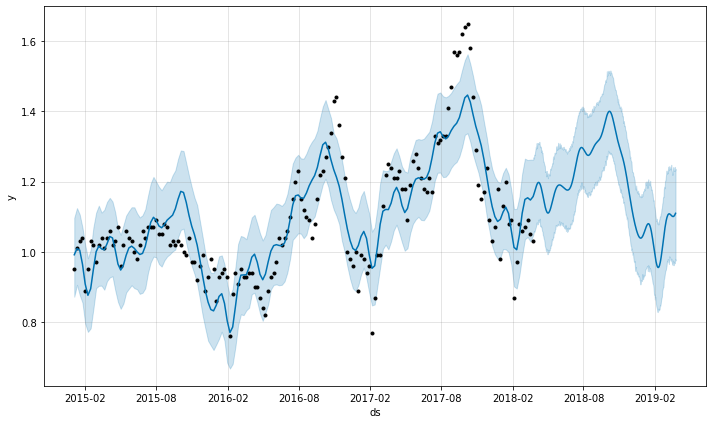

In [589]:
fig1 = m.plot(forecast)


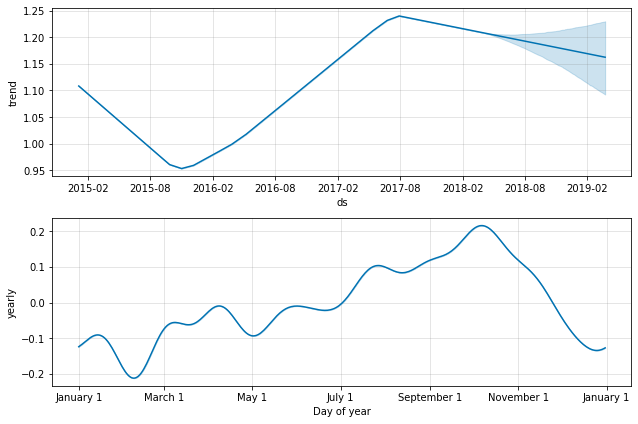

In [587]:
fig2 = m.plot_components(forecast)
